<div style="float: right; margin: 0px 0px 10px 10px"><img src="logo.png" alt="UGR" width="200"></div>

# **EXAMEN PRÁCTICA 3**

> **Alumno**: Quintín Mesa Romero

>  **Curso**: 3º DGIIM
  
>  **DNI**: 
  
>  **Correo**: 

En primer lugar importamos todas las librerías que van a ser utilizadas en el desarrollo del examen:

In [4]:
import sympy as sp
import numpy as np
from tabulate import tabulate
%matplotlib inline
import matplotlib.pyplot as plt

En primer lugar, vamos a definir la función y obtener su solución exacta:

In [7]:
a, b = 0, 1
ya = 1
ab1, ab2, ab3 = [], [], []  # Adam-Bashfort para k=1, k=2, k=3
t, y0, z = sp.symbols('t, y_0,  z')

def f(t,z):
    return (t-z)/2

In [8]:
# Vamos a empezar definiendo la Ec. Dif. Ordinaria (edo) a resolver
y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
sp.Eq(edo,0)
# y la resolvemos simbólicamente mediante la orden dsolve de SymPy
edo_sol = sp.dsolve(edo)
# Imonemos las condiciones iniciales
ics = {y(0): y0}
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0)) #la ecuación asociada 
# a la imposición de la condición inicial del PVI
CI_sol = sp.solve(CI_eq) # que resolvemos mediante la orden solve
# para obtener la única solución exacta de nuestro PVI 
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})

y_x = sp.lambdify(t, sol_exacta, 'numpy')
xx = np.linspace(a,b,100)

Una vez definido todo lo relativo a la función del PVI y su solución exacta, voy a implementar los tres métodos **Adam-Bashfort** con **k=1, k=2,k=3**

### K=1

Para k=1, tenemos el método de Euler explícito:

In [29]:
def integrateAB1(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n],Y[n]))
    return np.array(X),np.array(Y)

### K=2

$y_{n+2} = y_{n+1} + \frac{h}{2} (3 f_{n+1} - f_{n})$

In [30]:
def AB2(F,x0,y0,y1,h):
        return (3*F(x0+h,y1)-F(x0,y0))/2 

In [31]:
def integrateAB2(F,x0,y0,xfinal,N):
    
    import numpy as np   
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n+1] + h*AB2(F,X[n],Y[n],Y[n+1],h))
    return np.array(X),np.array(Y)

### K=3

$ y_{n+3} = y_{n+2} + \frac{h}{12}(23f_{n+2}-16f_{n+1}+5f_{n})$

In [49]:
def integrateAB3(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AB3(F,x0,y0,y1,y2,h):
        return (23*F(x0+2*h,y2)-16*F(x0+h,y1)+5*F(x0,y0))/12  
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); 
    y2 = y1 + h*AB2(F,x0,y0,y1,h)
    Y = [y0,y1,y2]
    for n in range(N-2):
        Y.append(Y[n+2] + h*AB3(F,X[n],Y[n],Y[n+1],Y[n+2],h))
    return np.array(X),np.array(Y)

Se nos pide que el paso sea de $h=0.1$, entonces, teniendo en cuenta que 


$$h=\frac{b-a}{N} \Longleftrightarrow 0.1= \frac{1}{N}$$


obtenemos que se requiere una partición del intervalo de $10$ subintervalos

In [50]:
N = 10 # Número de iteraciones
err_ab1, err_ab2, err_ab3 = ['ERROR Adam-Bashfort k=1'],['ERROR Adam-Bashfort k=2'],['ERROR Adam-Bashfort k=3']

adamBash1 = {'xx': integrateAB1(f,a,ya,b,N)[0], 'yy': integrateAB1(f,a,ya,b,N)[1]}
adamBash2 = {'xx': integrateAB2(f,a,ya,b,N)[0], 'yy': integrateAB2(f,a,ya,b,N)[1]}
adamBash3 = {'xx': integrateAB3(f,a,ya,b,N)[0], 'yy': integrateAB3(f,a,ya,b,N)[1]}


In [51]:
head = ['ERRORES', 'N = 10', '']
err_ab1.append(max(abs(adamBash1['yy']-y_x(adamBash1['xx']))))
err_ab2.append(max(abs(adamBash2['yy']-y_x(adamBash2['xx']))))
err_ab3.append(max(abs(adamBash3['yy']-y_x(adamBash3['xx']))))

print(tabulate([err_ab1, err_ab2, err_ab3],head))

ERRORES                      N = 10
-----------------------  ----------
ERROR Adam-Bashfort k=1  0.0233812
ERROR Adam-Bashfort k=2  0.00368827
ERROR Adam-Bashfort k=3  0.00368827


In [52]:
%%timeit
integrateAB1(f,a,ya,b,N)

31.1 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [53]:
%%timeit
integrateAB2(f,a,ya,b,N)

42.1 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [54]:
%%timeit
integrateAB3(f,a,ya,b,N)

50.8 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Comparación con la solución exacta

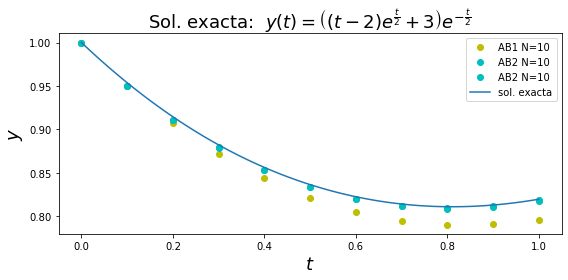

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(adamBash1['xx'],adamBash1['yy'], 'yo',label = "AB1 N={}".format(N))
ax.plot(adamBash2['xx'],adamBash2['yy'], 'co',label = "AB2 N={}".format(N))
ax.plot(adamBash3['xx'],adamBash3['yy'], 'co',label = "AB2 N={}".format(N))
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

### Observaciones
Se observa claramente tanto en los errores cometidos, como gráficamente que los métodos AB2 y AB3 aproximan mejor la solución (y de la misma manera) que el método AB1.
Anque los primeros suponen mayor coste computacional.